# 8.1 MNIST 데이터베이스

In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#20180368 박세진

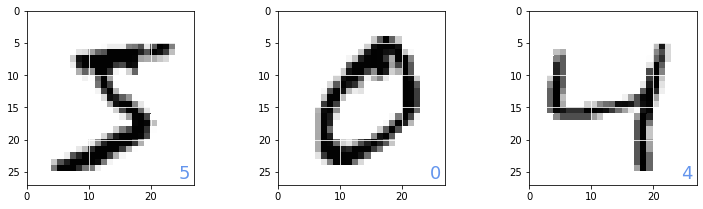

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id+1)
    img = x_train[id, :, :]
    plt.pcolor(255-img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue',
            fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()
#20180368 박세진

# 8.2 2층 피드 포워드 네트워크 모델

In [3]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)
#20180368 박세진

In [4]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import tensorflow

model = Sequential()
model.add(Dense(16, input_dim=784, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
              metrics=['accuracy'])
#20180368 박세진

In [5]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                   verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))
#20180368 박세진

Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 2.0745 - accuracy: 0.3699 - val_loss: 1.8089 - val_accuracy: 0.5941
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 1.6392 - accuracy: 0.6682 - val_loss: 1.4757 - val_accuracy: 0.7271
Epoch 3/10
60/60 [==============================] - 1s 9ms/step - loss: 1.3556 - accuracy: 0.7525 - val_loss: 1.2311 - val_accuracy: 0.7798
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 1.1413 - accuracy: 0.7922 - val_loss: 1.0427 - val_accuracy: 0.8114
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.9764 - accuracy: 0.8198 - val_loss: 0.8974 - val_accuracy: 0.8368
Epoch 6/10
60/60 [==============================] - 0s 6ms/step - loss: 0.8486 - accuracy: 0.8415 - val_loss: 0.7849 - val_accuracy: 0.8537
Epoch 7/10
60/60 [==============================] - 0s 6ms/step - loss: 0.7488 - accuracy: 0.8558 - val_loss: 0.6966 - val_accuracy: 0.8682
Epoch 8/10
60/60 [=

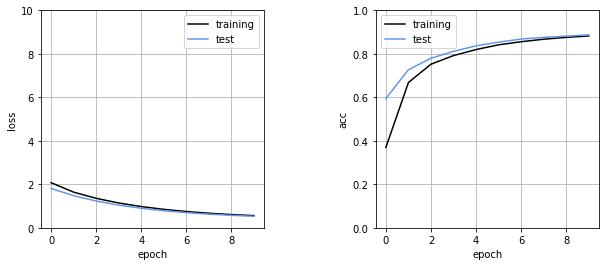

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
                        color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()
#20180368 박세진

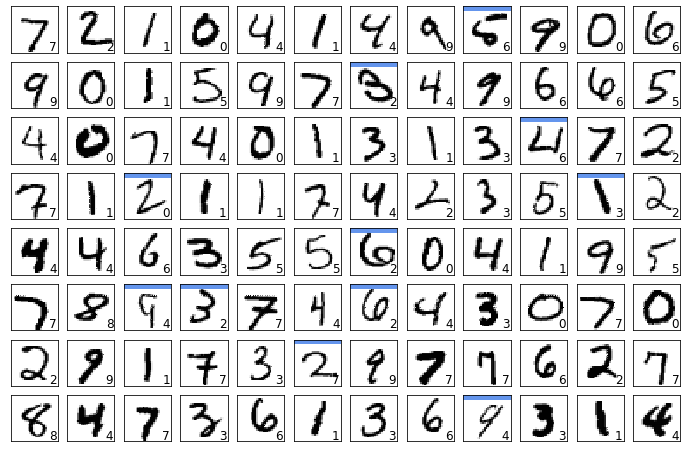

In [7]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
        
show_prediction()
plt.show()
#20180368 박세진

# 8.3 ReLU 활성화 함수

In [8]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
             metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                   verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))
#20180368 박세진

Epoch 1/10
60/60 [==============================] - 1s 9ms/step - loss: 1.4784 - accuracy: 0.5948 - val_loss: 0.8066 - val_accuracy: 0.8156
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 0.6424 - accuracy: 0.8431 - val_loss: 0.4959 - val_accuracy: 0.8809
Epoch 3/10
60/60 [==============================] - 0s 7ms/step - loss: 0.4605 - accuracy: 0.8820 - val_loss: 0.3943 - val_accuracy: 0.8986
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 0.3859 - accuracy: 0.8969 - val_loss: 0.3463 - val_accuracy: 0.9081
Epoch 5/10
60/60 [==============================] - 0s 8ms/step - loss: 0.3451 - accuracy: 0.9057 - val_loss: 0.3172 - val_accuracy: 0.9150
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3191 - accuracy: 0.9118 - val_loss: 0.2984 - val_accuracy: 0.9183
Epoch 7/10
60/60 [==============================] - 1s 11ms/step - loss: 0.3009 - accuracy: 0.9161 - val_loss: 0.2832 - val_accuracy: 0.9214
Epoch 8/10
60/60 [

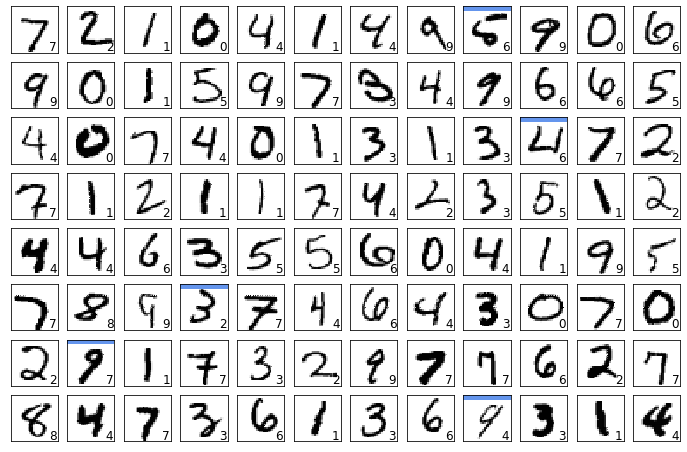

In [9]:
show_prediction()
plt.show()
#20180368 박세진

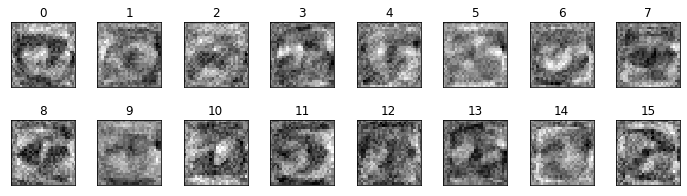

In [10]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12,3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i+1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
plt.show()
#20180368 박세진

# 8.4 공간 필터

In [11]:
%reset
#20180368 박세진

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)#20180368 박세진

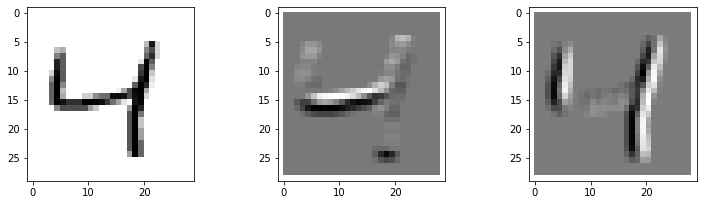

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1, 1, 1], [1, 1, 1], [-2, -2, -2]], dtype = float)
myfil2 = np.array([[-2, 1, 1], [-2, 1, 1], [-2, 1, 1]], dtype = float)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih+3, iw:iw+3]
        out_img1[ih + 1, iw+1] = np.dot(img_part.reshape(-1),
                                       myfil1.reshape(-1))
        out_img2[ih + 1, iw+1] = np.dot(img_part.reshape(-1),
                                       myfil2.reshape(-1))
        
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1-x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()
#20180368 박세진

# 8.5 합성곱 신경망

In [14]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
             metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                   verbose=1, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])
print('Computation time : {0:.3f} sec'.format(time.time() - startTime))
#20180368 박세진

Epoch 1/20
60/60 [==============================] - 8s 127ms/step - loss: 0.8331 - accuracy: 0.7994 - val_loss: 0.3516 - val_accuracy: 0.9023
Epoch 2/20
60/60 [==============================] - 7s 113ms/step - loss: 0.3225 - accuracy: 0.9081 - val_loss: 0.2775 - val_accuracy: 0.9229
Epoch 3/20
60/60 [==============================] - 6s 108ms/step - loss: 0.2674 - accuracy: 0.9237 - val_loss: 0.2374 - val_accuracy: 0.9344
Epoch 4/20
60/60 [==============================] - 6s 104ms/step - loss: 0.2276 - accuracy: 0.9355 - val_loss: 0.2075 - val_accuracy: 0.9409
Epoch 5/20
60/60 [==============================] - 6s 107ms/step - loss: 0.1946 - accuracy: 0.9460 - val_loss: 0.1769 - val_accuracy: 0.9532
Epoch 6/20
60/60 [==============================] - 8s 125ms/step - loss: 0.1678 - accuracy: 0.9539 - val_loss: 0.1569 - val_accuracy: 0.9578
Epoch 7/20
60/60 [==============================] - 7s 110ms/step - loss: 0.1473 - accuracy: 0.9599 - val_loss: 0.1394 - val_accuracy: 0.9628
Epoch 

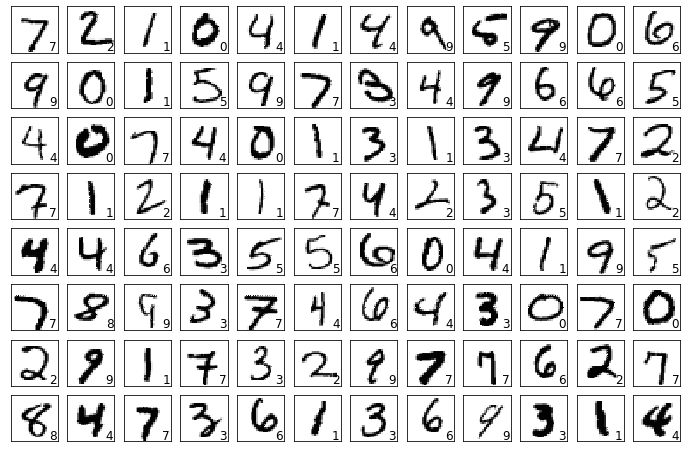

In [15]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i+1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1-x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
        
show_prediction()
plt.show()
#20180368 박세진

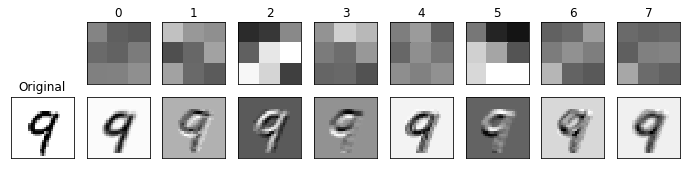

In [16]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i+2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" %i)
    plt.subplot(2, 9, i+11)
    out_img = np.zeros_like(x_img)
    
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih+3, iw:iw+3]
            out_img[ih+1, iw+1] = np.dot(img_part.reshape(-1),w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()
#20180368 박세진

# 8.6 풀링

# 8.7 드롭아웃

# 8.8 MNIST 인식 네트워크 모델

In [17]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(),
             metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                   verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss : ", score[0])
print('Test accuracy : ', score[1])
print('Computation time : {0:.3f} sec'.format(time.time() - startTime))
#20180368 박세진

Epoch 1/20
60/60 [==============================] - 44s 739ms/step - loss: 0.6783 - accuracy: 0.7900 - val_loss: 0.1317 - val_accuracy: 0.9598
Epoch 2/20
60/60 [==============================] - 50s 839ms/step - loss: 0.1389 - accuracy: 0.9570 - val_loss: 0.0658 - val_accuracy: 0.9778
Epoch 3/20
60/60 [==============================] - 45s 748ms/step - loss: 0.0913 - accuracy: 0.9720 - val_loss: 0.0486 - val_accuracy: 0.9834
Epoch 4/20
60/60 [==============================] - 46s 770ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0363 - val_accuracy: 0.9871
Epoch 5/20
60/60 [==============================] - 47s 786ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0330 - val_accuracy: 0.9883
Epoch 6/20
60/60 [==============================] - 46s 768ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0305 - val_accuracy: 0.9899
Epoch 7/20
60/60 [==============================] - 47s 788ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0286 - val_accuracy: 0.9898

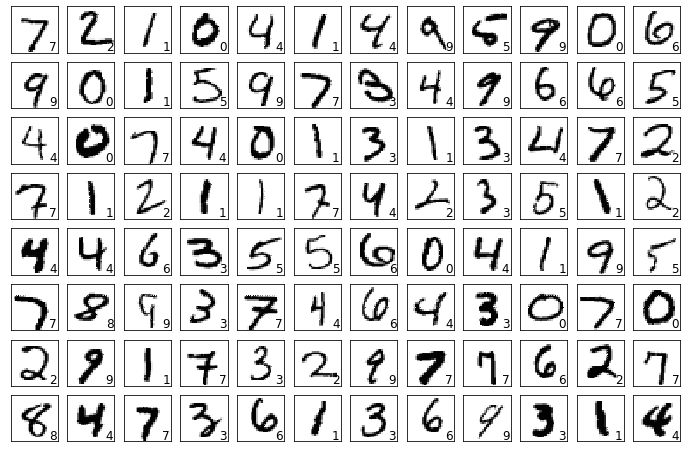

In [18]:
show_prediction()
plt.show()
#20180368 박세진